# Learning and Validation Curves

In [28]:
%matplotlib inline
import numpy as np
from sklearn.learning_curve import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt

In [30]:
np.random.seed(0)
digits = load_digits()
X, y = digits.data, digits.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_range = np.logspace(-6,-1,5)
kf = KFold(y.shape[0], n_folds=10)

train_scores, valid_scores = validation_curve(SVC(), X, y, param_name="gamma", 
                                              param_range=param_range, cv = kf, scoring="accuracy")

In [31]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

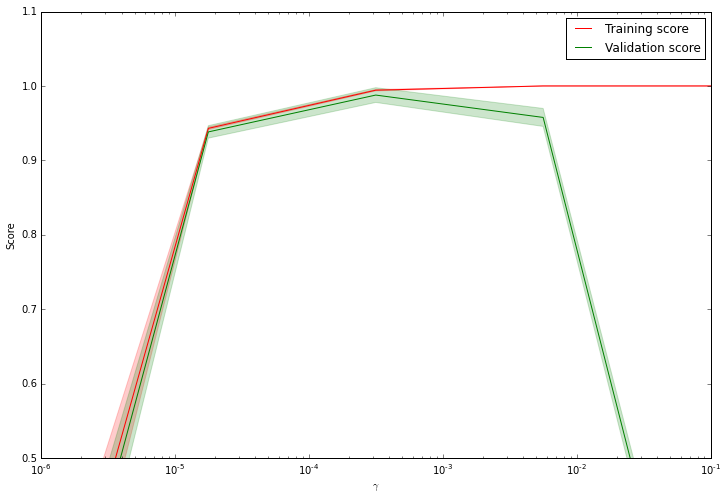

In [32]:
plt.figure(figsize=(12,8))
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim([0.5, 1.1])
plt.semilogx(param_range, np.mean(train_scores, axis=1), label = "Training score", color="r")
plt.fill_between(param_range, train_scores_mean + train_scores_std, 
                train_scores_mean - train_scores_std, color = "r", alpha=0.2)
plt.semilogx(param_range, np.mean(valid_scores, axis = 1), label = "Validation score", color="g")
plt.fill_between(param_range, valid_scores_mean + valid_scores_std, 
                valid_scores_mean - valid_scores_std, color = "g", alpha=0.2)

plt.legend(loc="best")
plt.show()

How to reduce **High Bias**?
1. Add more features
2. Use a more sophisticated model
3. Use fewer examples
4. Decrease regularization

How to reduce **High variance**?
1. Use fewer features
2. Use more training samples
3. Increase regularization